In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

#### 1. Load the data using the the data type pandas DataFrame.
I choose to regress two models for two turbines as I don't have any further information about the turbine.

In [2]:
# Load both dataframes
df_turbine1 = pd.read_csv('Turbine1.csv', sep=';')
df_turbine2 = pd.read_csv('Turbine2.csv', sep=';')

In [3]:
# Simple data inspection of features and the data types
# df_turbine1.head()
# df_turbine2.head()
# df_turbine1.columns.to_list()
# df_turbine2.iloc[2,3]

I found that ther're redundant spaces in the strings as column names in the dataframe.
And also all the decimal numbers are in the string format with comma instead of decimal dot.
So I write the following function to prepare the data.

In [4]:
# Function to clean and preprocess data format
def clean_df(df):
    # remove redundant spaces in the feature column names
    df.columns = df.columns.str.replace(' ','')
    # replace commas with decimal dots and change data format to float number instead of strings
    df.iloc[1:,1:] = df.iloc[1:,1:].applymap(lambda x: float(x.replace(',','.')))
    # for the regression task we only take for now all features except for date time
    df_features = df.iloc[1:,1:]
    return df_features

turbine1_features  = clean_df(df_turbine1)
turbine2_features = clean_df(df_turbine2)

In [5]:
# Select the feature and the target
x_1 = turbine1_features[['Wind']]
y_1 = turbine1_features[['Leistung']]
x_2 = turbine2_features[['Wind']]
y_2 = turbine2_features[['Leistung']]

In [6]:
# Split into trainiing and test set for further evaluation
x1_train, x1_test, y1_train, y1_test = train_test_split(x_1, y_1 , test_size=0.2, random_state=22)
x2_train, x2_test, y2_train, y2_test = train_test_split(x_2, y_2 , test_size=0.2, random_state=22)

#### 2. Train any ML Model that predicts the power (single target) by a given windspeed (single feature).
I use a simple linear regression model to fit the data.

In [7]:
# Function to trian a simple linear regression model
def train_lr(x_train, y_train):
    model = LinearRegression()
    model.fit(x_train, y_train)
    return model

#### 3. Choose a good metric to measure the model performance.
I use the mean squared error as a metric to measure the model performance.

In [8]:
# Function to evaluate the trained regression model
def test_lr(x_test, y_test, model):
    predictions = model.predict(x_test)
    test_loss = mean_squared_error(y_test, predictions)
    return predictions, test_loss

In [9]:
# Test both models on Turbine 1 and 2
# Turbine 1 with 1 feature -> t1_f1
model_t1_f1 = train_lr(x1_train, y1_train)
model_t2_f1 = train_lr(x2_train, y2_train)
_, test_loss_t1_f1 = test_lr(x1_test, y1_test, model_t1_f1)
_, test_loss_t2_f1 = test_lr(x2_test, y2_test, model_t2_f1)
print(test_loss_t1_f1)
print(test_loss_t2_f1)

22210.228115587095
25847.709432264848


#### 4. Explain why you chose this model architecture and what the limitations of this architecture might be.

I chose a linear regression model because for a regression task with one feature as input it would be the most straightforward and intuitive method to pick. Also logically speaking, the higher the windspeed is, the more power we would expect from the turbine. This is also proved by the next code block where I analyzed the correlation between features.

The limitations of a linear regression model is that in the end it only can learn linear functions to represent the relationships between features and target variable. So it can't model the non-linearity as a DNN since it has no such acivation function. Also as I picked mean squared error as the metric, it can also be prone to outliers in the dataset.

#### 5. Try out additional features. Which features did you choose? How did the results change and why?

There're a lot of features in the dataframe. To pick meaningful ones, I first analyzed the correlation between all other features and the target feature Leistung. It turns out the 'Strom-', 'Gen1-', 'Strom-.1', 'Strom-.2' features are also highly correlated to the power. So I pick these four additional features for the linear regression model here.

ps: Although I don't really know what Gen1- stands for, but that higher current leads to higher power definitely makes sense to me.

In [10]:
# Calculate the correlation
cor_t1 = turbine1_features.corr()
cor_t2 = turbine2_features.corr()

cor_t1_target = abs(cor_t1['Leistung'])
cor_t2_target = abs(cor_t2['Leistung'])

print(cor_t1_target[cor_t1_target > 0.9])
print(cor_t2_target[cor_t2_target > 0.9])

Wind        0.946330
Leistung    1.000000
Gen1-       0.931303
Strom-      0.998496
Strom-.1    0.998323
Strom-.2    0.998467
Name: Leistung, dtype: float64
Wind        0.941897
Leistung    1.000000
Gen1-       0.939169
Strom-      0.999226
Strom-.1    0.999247
Strom-.2    0.999247
Name: Leistung, dtype: float64


In [11]:
# Pick the new features and set up the new dataset
x_1 = turbine1_features[['Wind', 'Strom-', 'Gen1-', 'Strom-.1', 'Strom-.2']]
y_1 = turbine1_features[['Leistung']]
x_2 = turbine2_features[['Wind', 'Strom-', 'Gen1-', 'Strom-.1', 'Strom-.2']]
y_2 = turbine2_features[['Leistung']]

In [12]:
# Split into train and test set in the same random order
x1_train, x1_test, y1_train, y1_test = train_test_split(x_1, y_1 , test_size=0.2, random_state=22)
x2_train, x2_test, y2_train, y2_test = train_test_split(x_2, y_2 , test_size=0.2, random_state=22)

In [13]:
# Train and test the model
# Note we now have a much better performance on the test set
# Turbine 1 with 5 features -> t1_f5
model_t1_f5 = train_lr(x1_train, y1_train)
model_t2_f5 = train_lr(x2_train, y2_train)
_, test_loss_t1_f5 = test_lr(x1_test, y1_test, model_t1_f5)
_, test_loss_t2_f5 = test_lr(x2_test, y2_test, model_t2_f5)
print(test_loss_t1_f5)
print(test_loss_t2_f5)

507.50575954253844
291.3729375838336


#### 6. Based on this model, where would you suspect turbine anomalies? Please list time frames and visualize the anomalies.
To answer this question, I would say that anomaly can be where the data points lie far away from the model predictions. To define how "far away" a point should be defined as an outlier/ anomaly, I assume the residual between predictions and ground truths to be a zero-mean normal distribution. Then I take the RMSE error on the entire dataset as the standard deviation. I plot the residuals and the 1sigma, 2sigma lines to help visualize the outliers as 95% of data should be covered within 2-sigmas around the mean. I save the anomalous time points into new dataframes in the end.

In [14]:
# Perform inference on the entire dataset
preds_t1_all, loss_t1_f5 = test_lr(x_1, y_1, model_t1_f5)
preds_t2_all, loss_t2_f5 = test_lr(x_2, y_2, model_t2_f5)

# Calculate residuals
residuals_t1 = preds_t1_all - y_1
residuals_t2 = preds_t2_all - y_2

# Get RMSE as the sigma
sigma1_t1 = loss_t1_f5 ** 0.5
sigma1_t2 = loss_t2_f5 ** 0.5

In [15]:
# Test the zero-mean on both residuals
# print(residuals_t1.mean()[0])
# print(residuals_t2.mean()[0])

In [16]:
# Function to plot the residuals and sigma lines for intuitive visualization
def plot_anomaly(residuals, sigma1, turbine_number):
    plt.figure(figsize=(8, 6))
    plt.scatter(list(range(len(residuals))), residuals, color='blue', label='Residuals')
    plt.axhline(y=sigma1, color='red', linestyle='--',label='1sigma')
    plt.axhline(y=-sigma1, color='red', linestyle='--')
    plt.axhline(y=2*sigma1, color='green', linestyle='--', label='2sigma')
    plt.axhline(y=-2*sigma1, color='green', linestyle='--')
    plt.xlabel('Date Index')
    plt.ylabel('Residuals')
    plt.title('Residuals of Turbine {}'.format(turbine_number))
    plt.legend()
    plt.tight_layout()
    plt.show()

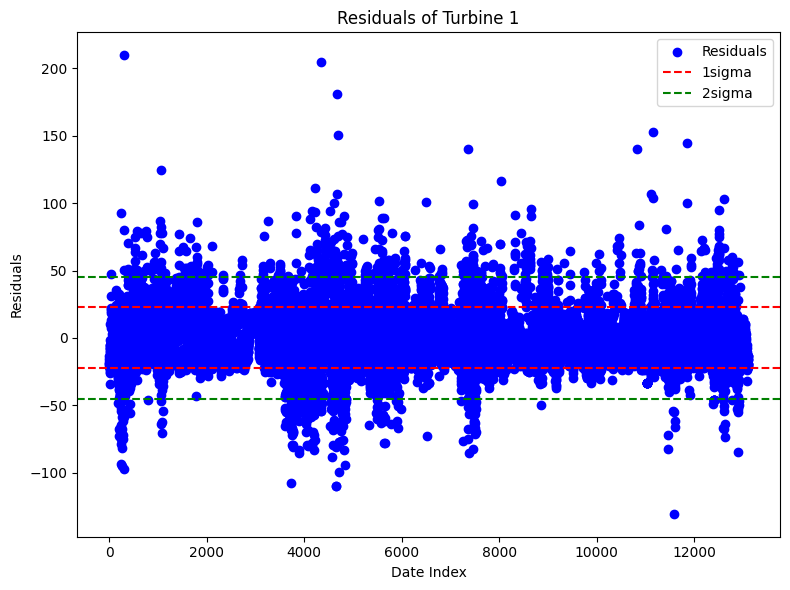

In [17]:
plot_anomaly(residuals_t1, sigma1_t1, 1)

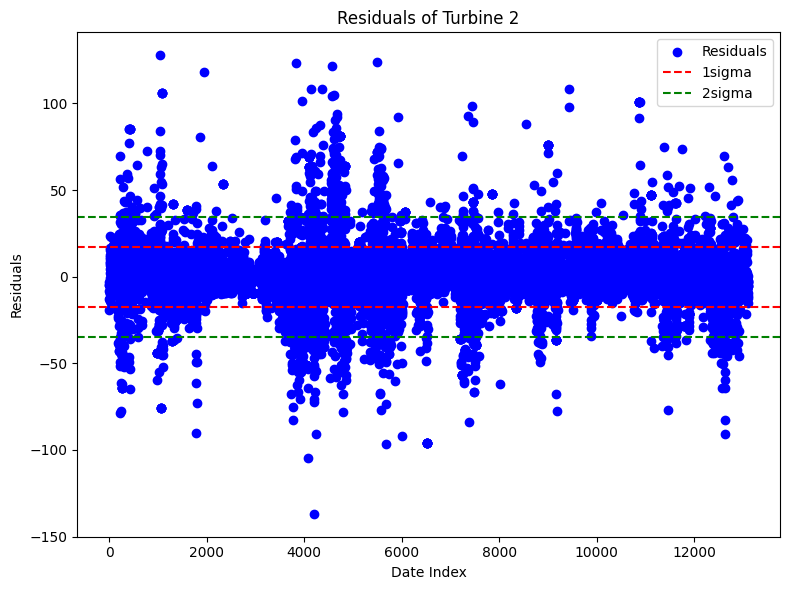

In [18]:
plot_anomaly(residuals_t2, sigma1_t2, 2)

In [19]:
# Save the anomalous time into new dataframe
anomaly_turbine1 = df_turbine1.iloc[np.where(np.abs(residuals_t1) > 2*sigma1_t1)[0]+1,:]
anomaly_turbine2 = df_turbine2.iloc[np.where(np.abs(residuals_t2) > 2*sigma1_t2)[0]+1,:]

In [20]:
# List the time frames
list_anomaly_t1 = anomaly_turbine1['Dat/Zeit'].tolist()
list_anomaly_t2 = anomaly_turbine2['Dat/Zeit'].tolist()

# anomaly_turbine1.head(10)
# anomaly_turbine2.head(10)